In [ ]:
import tensorflow as tf

In [ ]:
m = tf.saved_model.load('../../model/saved_model')

OSError: SavedModel file does not exist at: ./experiments/ssd-2/exported/saved_model/{saved_model.pbtxt|saved_model.pb}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL as pil

In [ ]:
img = pil.Image.open('./sample-images/img0.png')

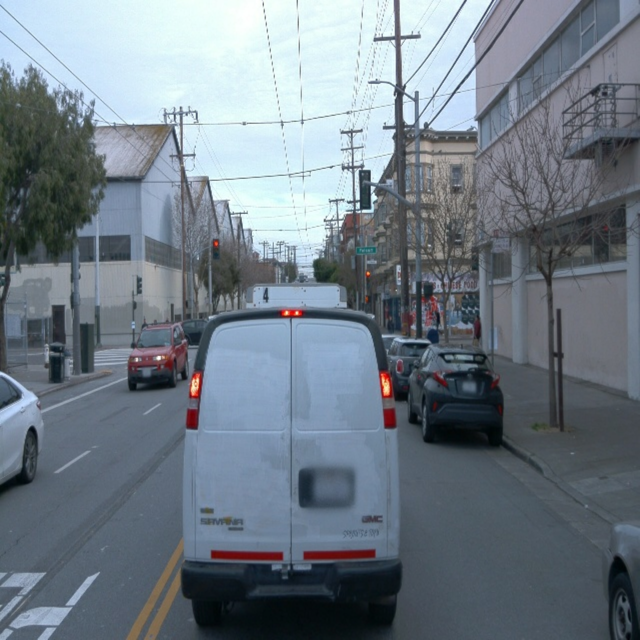

In [ ]:
img.resize([640,640])

In [ ]:
img.transform()

In [ ]:
img_n = np.array(img.resize([640,640]))
img_n[:,:,:3].shape

(640, 640, 3)

In [ ]:
img_t = np.expand_dims(img_n[:,:,:3],axis=0)
img_t.shape

(1, 640, 640, 3)

In [ ]:
image_np = img_n[:,:,:3].astype(np.uint8)

In [ ]:
op = m(img_t)

In [ ]:
op

{'detection_boxes': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
 array([[[0.42332673, 0.2752361 , 0.9941664 , 0.6400417 ],
         [0.53338945, 0.6373236 , 0.7005439 , 0.7896049 ],
         [0.58223915, 0.        , 0.76961625, 0.06644146],
         [0.5004621 , 0.19686553, 0.6111339 , 0.29584345],
         [0.52694726, 0.5999744 , 0.6300876 , 0.6743431 ],
         [0.8096168 , 0.9400762 , 0.9984969 , 0.9994413 ],
         [0.49677372, 0.27662748, 0.5394002 , 0.3238079 ],
         [0.5202441 , 0.59554434, 0.55459094, 0.6410787 ],
         [0.49191773, 0.7387407 , 0.54241383, 0.7528573 ],
         [0.48777702, 0.6012842 , 0.5230729 , 0.613089  ],
         [0.42891794, 0.4656555 , 0.4439175 , 0.4794646 ],
         [0.4289714 , 0.46633866, 0.4387566 , 0.47323236],
         [0.42912748, 0.47109127, 0.4377335 , 0.47741765],
         [0.4293765 , 0.47245255, 0.44379064, 0.4857625 ],
         [0.501961  , 0.66947937, 0.5394707 , 0.68867815],
         [0.42970312, 0.45996562, 0.439322

In [ ]:
op.keys()

dict_keys(['detection_boxes', 'detection_anchor_indices', 'raw_detection_boxes', 'detection_scores', 'raw_detection_scores', 'detection_multiclass_scores', 'num_detections', 'detection_classes'])

In [ ]:
from object_detection.utils.label_map_util import create_category_index_from_labelmap
from object_detection.utils import visualization_utils as viz_utils

In [ ]:
category_index = create_category_index_from_labelmap('./label_map.pbtxt')

In [ ]:
image_np.shape

(640, 640, 3)

In [ ]:
detections = {key: value[0, ...].numpy()
                    for key, value in op.items()}
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)


image_np_with_detections = viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.30,
        agnostic_mode=False)

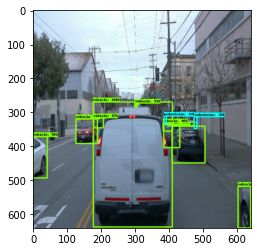

In [ ]:
%matplotlib inline
plt.imshow(image_np_with_detections)
plt.show()